In [9]:
import os

In [10]:
NUM_EXP = 120

In [11]:
for e in range(NUM_EXP):
    os.system(f'mkdir -p output/fps10/{e:03d}/images/')
    for i in range(1, 11):
        os.system(f'cp output/fps10/images/{i + e:04d}.jpg output/fps10/{e:03d}/images/')

for e in range(NUM_EXP):
    print(f'python imgs2poses.py output/fps10/{e:03d}/')

all_output = []

for i in range(NUM_EXP):
    # print(f'output/depth/{i:03d}/poses_bounds.npy')
    if os.path.isfile(f'/data1/yijia.xiao/usda/LLFF/output/fps10/{i:03d}/poses_bounds.npy'):
        all_output.append(i)

print(len(all_output), all_output)

# for e in range(NUM_EXP):
#     os.system(f'mkdir -p output/depth/{e:03d}/images/')
#     for i in range(1, 11):
#         os.system(f'cp output/fps2/images/{i + e:04d}.jpg output/depth/{e:03d}/images/')

# for e in range(NUM_EXP):
#     print(f'python imgs2poses.py output/depth/{e:03d}/')

# all_output = []
# for i in range(NUM_EXP):
#     # print(f'output/depth/{i:03d}/poses_bounds.npy')
#     if os.path.isfile(f'/data1/yijia.xiao/usda/LLFF/output/depth/{i:03d}/poses_bounds.npy'):
#         all_output.append(i)

# print(len(all_output), all_output)

python imgs2poses.py output/fps10/000/
python imgs2poses.py output/fps10/001/
python imgs2poses.py output/fps10/002/
python imgs2poses.py output/fps10/003/
python imgs2poses.py output/fps10/004/
python imgs2poses.py output/fps10/005/
python imgs2poses.py output/fps10/006/
python imgs2poses.py output/fps10/007/
python imgs2poses.py output/fps10/008/
python imgs2poses.py output/fps10/009/
python imgs2poses.py output/fps10/010/
python imgs2poses.py output/fps10/011/
python imgs2poses.py output/fps10/012/
python imgs2poses.py output/fps10/013/
python imgs2poses.py output/fps10/014/
python imgs2poses.py output/fps10/015/
python imgs2poses.py output/fps10/016/
python imgs2poses.py output/fps10/017/
python imgs2poses.py output/fps10/018/
python imgs2poses.py output/fps10/019/
python imgs2poses.py output/fps10/020/
python imgs2poses.py output/fps10/021/
python imgs2poses.py output/fps10/022/
python imgs2poses.py output/fps10/023/
python imgs2poses.py output/fps10/024/
python imgs2poses.py outp

In [12]:
# valid = all_output[3:-18]
valid = all_output
print(valid, len(valid))

[16, 17, 18, 23, 24, 45, 46, 47, 48, 49, 50, 51, 52, 53, 58, 59, 60, 61, 62, 73, 74, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119] 53


In [15]:
from load import load_data

# NUM_EXP = 30
pose_data = []

pose_dict = dict()
# for e in range(NUM_EXP):
for e in valid:
    pose_data.append(load_data(basedir=f'output/fps10/{e:03d}/'))
    pose_dict[e] = pose_data[-1]

Loaded image data (760, 1352, 3, 10) [ 760.         1352.          998.33078192]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.          997.40003284]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.          998.64438839]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1010.25684393]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1017.21728746]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1093.02248871]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1069.61216819]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1050.59783375]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1033.25976859]
Loaded image data (760, 1352, 3, 10) [ 760.        1352.        1038.5928341]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1032.50250696]
Loaded image data (760, 1352, 3, 10) [ 760.         1352.         1032.69339304]
Loaded image data (760, 1352, 3

In [16]:
len(pose_data)

53

In [47]:
idx2depth = dict()

for i in range(NUM_EXP):
    if i not in valid:
        idx2depth[i] = None
    else:
        idx2depth[i] = pose_dict[i]

In [48]:
CLOSE, INF = [], []

for idx, depth in idx2depth.items():
    if depth:
        close, inf = depth[1]
        # print(close.shape)
        CLOSE.extend(close)
        INF.extend(inf)

import statistics

def calc_min_max_mean_dev(L):
    return min(L), max(L), sum(L) / len(L), statistics.stdev(L)

calc_min_max_mean_dev(CLOSE), calc_min_max_mean_dev(INF)

((15.077830082516462,
  134.47929206123567,
  48.75534980648361,
  28.587099469772976),
 (52.00522971076626,
  387.06664683206174,
  135.69218106265922,
  88.65753373681376))

In [18]:
pose_data[0][0].shape, pose_data[0][1].shape

((3, 5, 10), (2, 10))

In [19]:
pose_data[1][0].shape, pose_data[1][1].shape

((3, 5, 10), (2, 10))

In [20]:
# depth_data = []

# for idx, pose in enumerate(pose_data):
#     if not pose:
#         print(idx, pose)
#     depth_data.append(pose[1])

In [21]:
# fps=2. 11 images per group, 30 groups in all. Discard first 5 (2 groups failed)
# for depth in depth_data:
#     print(depth_data)

In [22]:
# len(idx2depth)

In [23]:
# depth_data

In [25]:
# idx2depth

In [26]:
# idx2depth[0][1]

In [29]:
idx2depth[16][1]

array([[ 99.35769801, 100.52477461,  99.12780594,  98.74574273,
         98.89120915,  99.59578295,  98.80710539,  99.73623032,
        101.01953895, 102.82886963],
       [309.58579287, 308.49149603, 304.37873763, 303.81792175,
        299.78361115, 298.93301569, 297.95104128, 300.67443952,
        301.64141638, 305.95563457]])

In [41]:
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
# y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
x, y = [], []

# depth_data = idx2depth
for i in range(len(idx2depth)):
    for j in range(len(idx2depth[16][1])):
        x.append(i + j)
        if idx2depth[i] is not None:
            y.append(idx2depth[i][1][0][j])
        else:
            y.append(0)
        # y.append(depth_data[i][0][j])


x, y = np.array(x), np.array(y)
plt.scatter(x, y)


x, y = [], []
for i in range(len(idx2depth)):
    for j in range(len(idx2depth[16][1])):
        x.append(i + j)
        # y.append(depth_data[i][1][j])
        if idx2depth[i] is not None:
            y.append(idx2depth[i][1][1][j])
        else:
            y.append(0)

x, y = np.array(x), np.array(y)
plt.scatter(x, y)

plt.title('FPS = 10\nClose and Inf Depth\nBlue dots: close depth. Yellow dots: infinity depth.')

plt.xlabel('frame index')
plt.ylabel('depth')

# plt.show()
plt.savefig('./fps10-120.png')

KeyError: 16

In [32]:
p = {
    k: v
    for k, v in idx2depth.items() if k >= 88
}


In [34]:
# idx2depth[87]

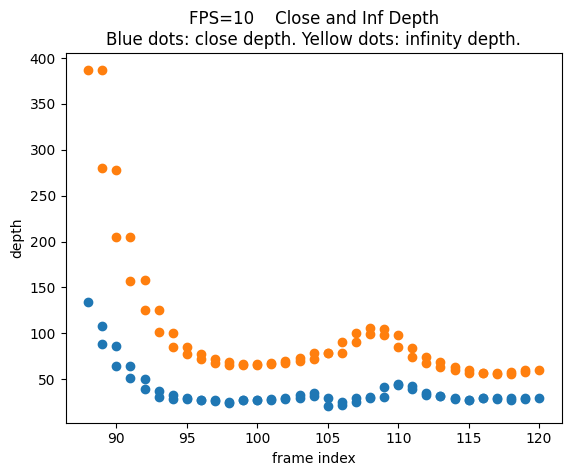

In [44]:
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
# y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
x, y = [], []

# depth_data = idx2depth
idx2depth = {
    k: v
    for k, v in idx2depth.items() if k >= 88
}
for i in range(len(idx2depth)):
    for j in range(len(idx2depth[88][1])):
        x.append(i + j + 88)
        if idx2depth[i + 88] is not None:
            y.append(idx2depth[i + 88][1][0][j])
        else:
            y.append(0)
        # y.append(depth_data[i][0][j])


x, y = np.array(x), np.array(y)
plt.scatter(x, y)


x, y = [], []
for i in range(len(idx2depth)):
    for j in range(len(idx2depth[88][1])):
        x.append(i + j + 88)
        # y.append(depth_data[i][1][j])
        if idx2depth[i + 88] is not None:
            y.append(idx2depth[i + 88][1][1][j])
        else:
            y.append(0)

x, y = np.array(x), np.array(y)
plt.scatter(x, y)

plt.title('FPS=10    Close and Inf Depth\nBlue dots: close depth. Yellow dots: infinity depth.')

plt.xlabel('frame index')
plt.ylabel('depth')

# plt.show()
plt.savefig('./fps10-30.png')

In [ ]:
CLOSE, INF = [], []

for idx, depth in idx2depth.items():
    if depth:
        close, inf = depth[1]
        # print(close.shape)
        CLOSE.extend(close)
        INF.extend(inf)

import statistics

def calc_min_max_mean_dev(L):
    return min(L), max(L), sum(L) / len(L), statistics.stdev(L)

calc_min_max_mean_dev(CLOSE), calc_min_max_mean_dev(INF)

In [46]:
len(idx2depth)

32

In [45]:
CLOSE, INF = [], []

for idx, depth in idx2depth.items():
    if depth:
        close, inf = depth[1]
        # print(close.shape)
        CLOSE.extend(close)
        INF.extend(inf)

import statistics

def calc_min_max_mean_dev(L):
    return min(L), max(L), sum(L) / len(L), statistics.stdev(L)

calc_min_max_mean_dev(CLOSE), calc_min_max_mean_dev(INF)

((15.077830082516462,
  134.47929206123567,
  35.819635891580525,
  19.03043770384038),
 (52.00522971076626, 387.06664683206174, 96.30878911171901, 69.11328967545234))

In [30]:
CLOSE, INF = [], []

for close, inf in depth_data:
    # print(close.shape)
    CLOSE.extend(close)
    INF.extend(inf)

In [32]:
import statistics

def calc_min_max_mean_dev(L):
    return min(L), max(L), sum(L) / len(L), statistics.stdev(L)

In [34]:
calc_min_max_mean_dev(CLOSE), calc_min_max_mean_dev(INF)

((5.589821102440255, 68.38848325165748, 17.09632806600643, 14.122085123784718),
 (9.350534285483427, 174.23050509235833, 44.73080282791705, 42.079562196427))

In [36]:
calc_min_max_mean_dev([i for i in CLOSE if i < 50]), calc_min_max_mean_dev([i for i in INF if i < 75])

((5.589821102440255,
  49.681047097241375,
  15.141958711621692,
  10.920568805929127),
 (9.350534285483427,
  74.52626776687083,
  20.122211109877714,
  11.730968776620012))

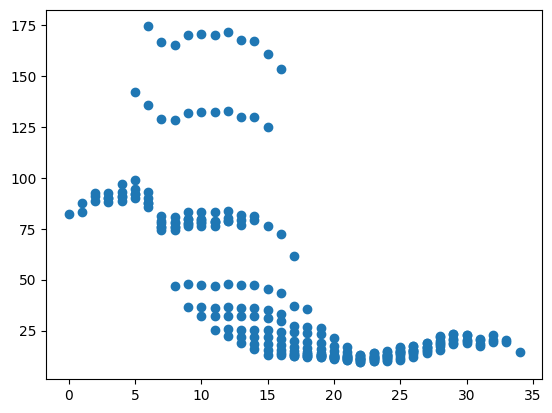

In [17]:
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
# y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
x, y = [], []

for i in range(len(depth_data)):
    for j in range(len(depth_data[0][0])):
        x.append(i + j)
        y.append(depth_data[i][1][j])

x, y = np.array(x), np.array(y)
plt.scatter(x, y)
plt.show()

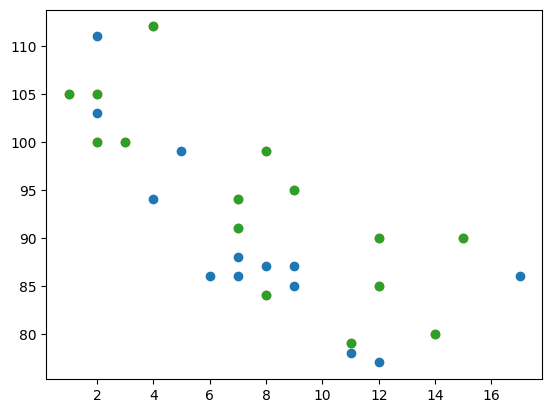

In [12]:
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y)

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)

plt.show()